Outlier Indices: [36, 203, 219, 284, 350, 392, 422, 428, 431, 445, 465, 503, 533, 555, 597, 697, 723, 1111, 1612, 1691, 1740, 1836, 2182, 2292, 2402, 2523]
Top Features: ['feature_0', 'feature_12', 'feature_13', 'index', 'feature_1']


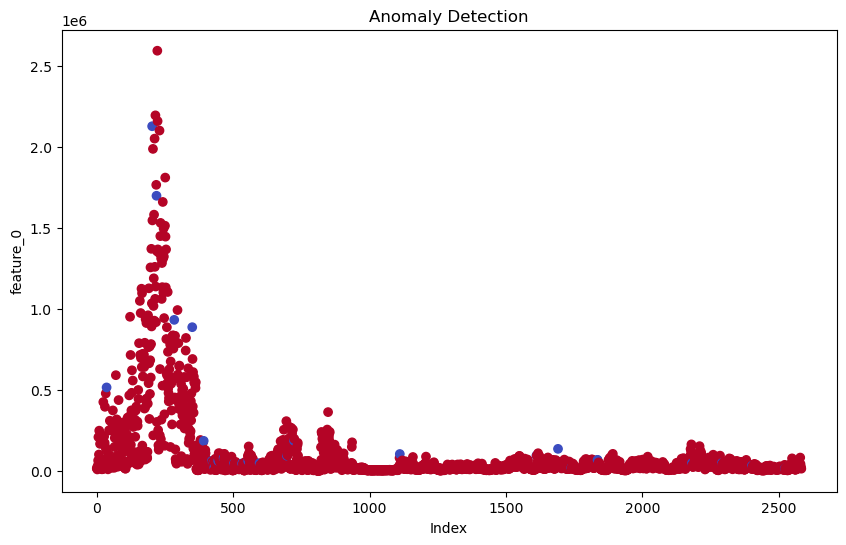

In [6]:
#Dawn Schmidt
#June 16, 2024
#ML-1 Assignment 3 - Earthquakes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

#load the data
df = pd.read_csv('A3_data.csv')

#normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#anomaly detection using isolation forest
iso = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = iso.fit_predict(df_scaled)

#extract outliers to new data frame
outliers = df[df['anomaly'] == -1]
outlier_indices = outliers.index.tolist()
print("Outlier Indices:", outlier_indices)

#using variance as a simple measure of feature importance
variance = df.var().sort_values(ascending=False)
top_features = variance.head(5).index.tolist()
print("Top Features:", top_features)

#plot anomaly detection with blue for anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df[top_features[0]], c=df['anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection')
plt.xlabel('Index')
plt.ylabel(top_features[0])
plt.show()


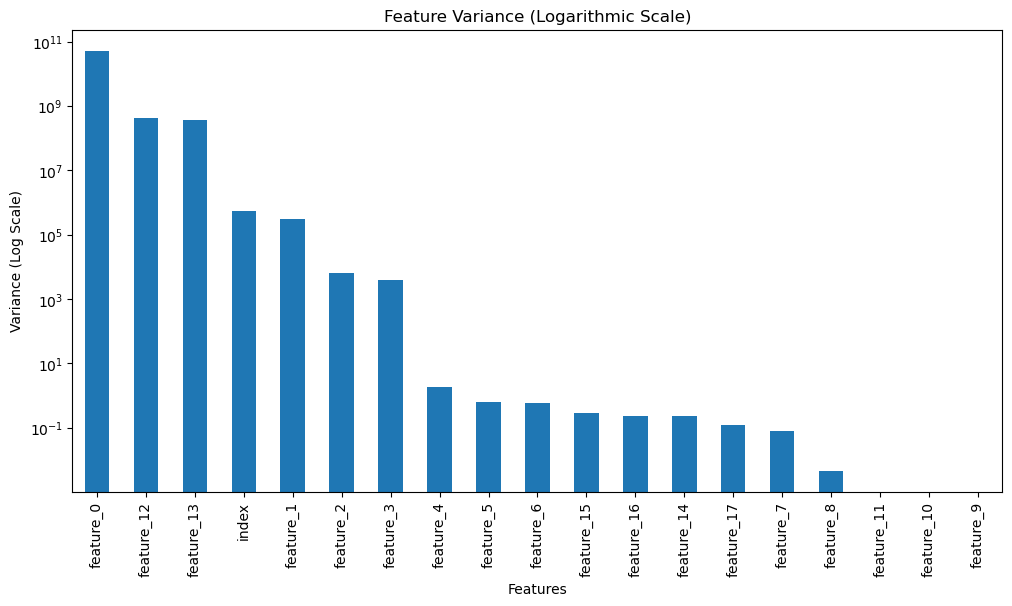

In [26]:
#plot the variance for each feature
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#calculate variance of each feature
feature_variance = df.var()

#sort the variances in descending order
feature_variance_sorted = feature_variance.sort_values(ascending=False)

#plot the variance on a logarithmic scale
plt.figure(figsize=(12, 6))
feature_variance_sorted.plot(kind='bar', logy=True)
plt.title('Feature Variance (Logarithmic Scale)')
plt.xlabel('Features')
plt.ylabel('Variance (Log Scale)')
plt.xticks(rotation=90)
plt.show()

In [8]:
#check for missing values in the data
missing_values = df.isnull().sum()

#print the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
index         0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
anomaly       0
dtype: int64
